Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-19045.132, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-19053.151, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-19051.154, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-19051.155, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-19054.701, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-19049.149, Time=1.38 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.200 seconds
Normalized RMSE (ARIMA): 0.1756


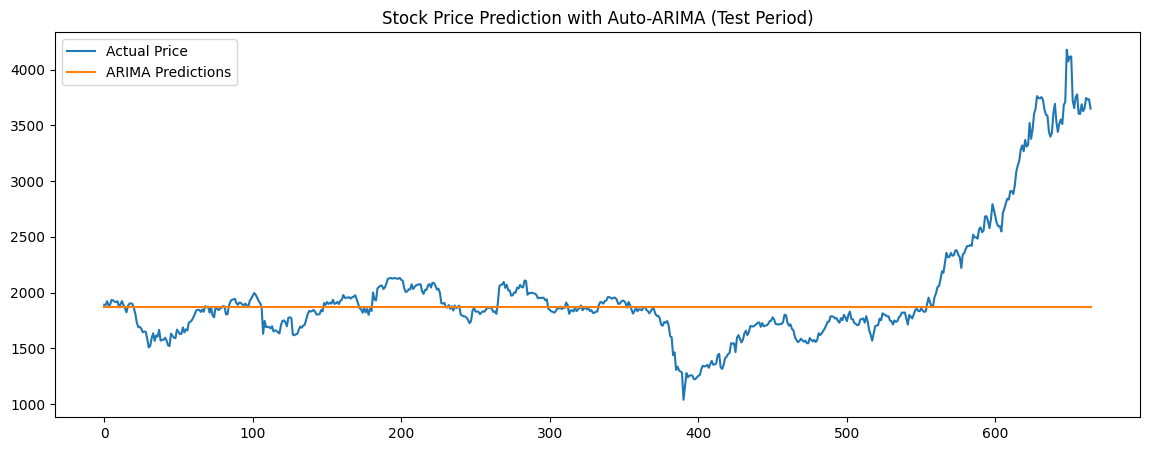

In [4]:
import pandas as pd
import pmdarima as pm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
data = pd.read_csv("ADANIPORTS.csv")
series = data['Close'].values.reshape(-1, 1)  # Assuming 'Close' is the target column

# Normalize the data
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

# Split the data into training and testing datasets
train_size = int(len(series_scaled) * 0.8)
train_data = series_scaled[:train_size]
test_data = series_scaled[train_size:]

# Step 2: Apply Auto-ARIMA on the training data
auto_arima_model = pm.auto_arima(train_data.flatten(), seasonal=False, stepwise=True, trace=True)

# Step 3: Predict only the test part using the trained ARIMA model
arima_pred = auto_arima_model.predict(n_periods=len(test_data))

# Step 4: Inverse transform and evaluate predictions
arima_pred_t = scaler.inverse_transform(arima_pred.reshape(-1, 1))
test_data_inv = scaler.inverse_transform(test_data)

# Step 5: Calculate RMSE and Normalized RMSE for test predictions only
rmse_arima = np.sqrt(mean_squared_error(test_data_inv, arima_pred_t))
normalized_rmse_arima = rmse_arima / (np.max(test_data_inv) - np.min(test_data_inv))
print(f'Normalized RMSE (ARIMA): {normalized_rmse_arima:.4f}')


# Step 6: Plot the actual vs predicted values
# Plot only for the test portion of the data
plt.figure(figsize=(14, 5))
plt.plot(scaler.inverse_transform(test_data), label='Actual Price')
plt.plot( arima_pred_t, label='ARIMA Predictions')
plt.title('Stock Price Prediction with Auto-ARIMA (Test Period)')
plt.legend()
plt.show()
